In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('Solar_power.csv')

In [11]:
data.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [13]:
data.isnull().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

In [19]:
X = data[['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
          'shortwave_radiation_backwards_sfc', 'angle_of_incidence', 'zenith', 'azimuth']]
y = data['generated_power_kw']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [27]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [29]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 416.356680887656
Root Mean Squared Error (RMSE): 538.1166513692622


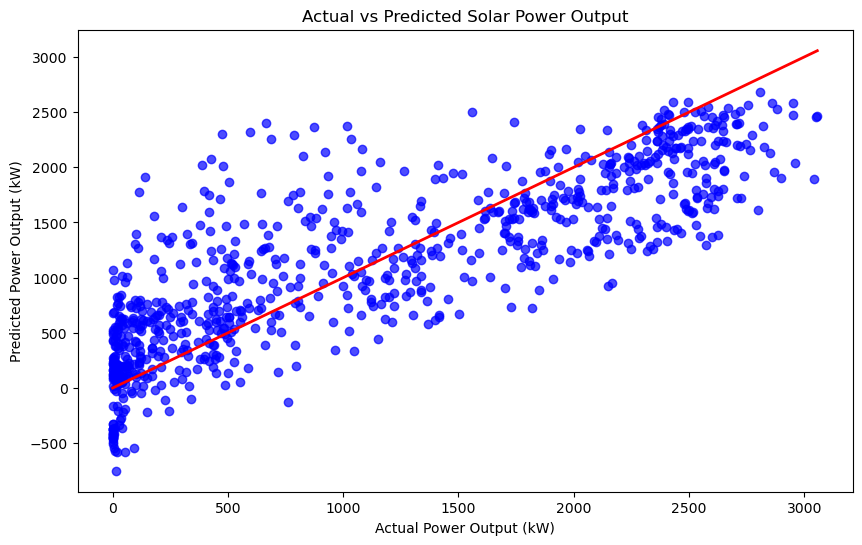

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Power Output (kW)")
plt.ylabel("Predicted Power Output (kW)")
plt.title("Actual vs Predicted Solar Power Output")
plt.show()

In [33]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [-15.03022454  -9.30458836   1.73709974 -16.04540443  -0.05935651
  -7.95389397]
Model Intercept: 3328.0158924591087


In [37]:
print("\n--- Solar Power Output Prediction ---")
print("Provide the following inputs:")

temp = float(input("Temperature (°C, 2m above ground): "))
humidity = float(input("Relative Humidity (%): "))
radiation = float(input("Shortwave Radiation (W/m²): "))
angle = float(input("Angle of Incidence (degrees): "))
zenith = float(input("Zenith Angle (degrees): "))
azimuth = float(input("Azimuth Angle (degrees): "))

user_input = pd.DataFrame({
    'temperature_2_m_above_gnd': [temp],
    'relative_humidity_2_m_above_gnd': [humidity],
    'shortwave_radiation_backwards_sfc': [radiation],
    'angle_of_incidence': [angle],
    'zenith': [zenith],
    'azimuth': [azimuth]
})

predicted_power = model.predict(user_input)[0]

print(f"\nPredicted Solar Power Output: {predicted_power:.2f} kW")


--- Solar Power Output Prediction ---
Provide the following inputs:


Temperature (°C, 2m above ground):  30
Relative Humidity (%):  50
Shortwave Radiation (W/m²):  300
Angle of Incidence (degrees):  45
Zenith Angle (degrees):  70
Azimuth Angle (degrees):  180



Predicted Solar Power Output: 775.11 kW
